# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [63]:
#Basic URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={api_key}&units={units}&q="

target_cities = []
target_lngs = []
target_lats = []
temp = []
cloudiness = []
countries = []
dates = []
humidities = []
max_temps = []
wind_speeds = []


for city in cities:
    response = requests.get(query_url + city).json()
    print(f'Retrieving results for City: {city}')
    if response.get('coord'):
        target_cities.append(response['name'])
        target_lngs.append(response['coord']['lon'])
        target_lats.append(response['coord']['lat'])
          
        city_cloudiness = response['clouds']['all']
        cloudiness.append(city_cloudiness)
        
        country = response['sys']['country']
        countries.append(country)
        
        date = response['dt']
        dates.append(date)
        
        humidity = response['main']['humidity']
        humidities.append(humidity)
        
        max_temp = response['main']['temp_max']
        max_temps.append(max_temp)
        
        wind_speed = response['wind']['speed']
        wind_speeds.append(wind_speed) 
        
        city_temp = response['main']['temp']
        temp.append(city_temp)
        print(f'Weather Check: {response}') 
    else:
        print(f'City: {city} was not found')


   

Retrieving results for City: rikitea
Weather Report: {'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20.89, 'pressure': 1019.6, 'humidity': 73, 'temp_min': 20.89, 'temp_max': 20.89, 'sea_level': 1019.6, 'grnd_level': 1019.51}, 'wind': {'speed': 6.64, 'deg': 107.523}, 'clouds': {'all': 100}, 'dt': 1571600951, 'sys': {'message': 0.0068, 'country': 'PF', 'sunrise': 1571581374, 'sunset': 1571627167}, 'timezone': -32400, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
Retrieving results for City: maragogi
Weather Report: {'coord': {'lon': -35.22, 'lat': -9.01}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.97, 'pressure': 1011.75, 'humidity': 83, 'temp_min': 22.97, 'temp_max': 22.97, 'sea_level': 1011.75, 'grnd_level': 1001.1}, 'wind': {'speed': 2.17, 'deg': 57.986}, 'clouds': {'all': 7

Retrieving results for City: taolanaro
City: taolanaro was not found
Retrieving results for City: kodinsk
Weather Report: {'coord': {'lon': 99.18, 'lat': 58.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -6.85, 'pressure': 1024.17, 'humidity': 76, 'temp_min': -6.85, 'temp_max': -6.85, 'sea_level': 1024.17, 'grnd_level': 995.9}, 'wind': {'speed': 1.39, 'deg': 264.656}, 'clouds': {'all': 87}, 'dt': 1571600956, 'sys': {'message': 0.0078, 'country': 'RU', 'sunrise': 1571616704, 'sunset': 1571652238}, 'timezone': 25200, 'id': 1503037, 'name': 'Kodinsk', 'cod': 200}
Retrieving results for City: eberndorf
Weather Report: {'coord': {'lon': 14.64, 'lat': 46.59}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 14.88, 'pressure': 1018, 'humidity': 76, 'temp_min': 11.11, 'temp_max': 18.33}, 'visibility': 10000, 'wind': {'speed': 1

Retrieving results for City: kaitangata
Weather Report: {'coord': {'lon': 169.85, 'lat': -46.28}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 9.44, 'pressure': 1000, 'humidity': 71, 'temp_min': 9.44, 'temp_max': 9.44}, 'wind': {'speed': 1.79, 'deg': 270, 'gust': 4.92}, 'rain': {'3h': 0.312}, 'clouds': {'all': 66}, 'dt': 1571600960, 'sys': {'type': 3, 'id': 2000217, 'message': 0.0065, 'country': 'NZ', 'sunrise': 1571592951, 'sunset': 1571642073}, 'timezone': 46800, 'id': 2208248, 'name': 'Kaitangata', 'cod': 200}
Retrieving results for City: barentsburg
City: barentsburg was not found
Retrieving results for City: khorramabad
Weather Report: {'coord': {'lon': 48.35, 'lat': 33.48}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.34, 'pressure': 1023, 'humidity': 82, 'temp_min': 12, 'temp_max': 15}, 'visibility': 10000, 'wind': 

Retrieving results for City: jamestown
Weather Report: {'coord': {'lon': 138.6, 'lat': -33.21}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 10.16, 'pressure': 1028.33, 'humidity': 72, 'temp_min': 10.16, 'temp_max': 10.16, 'sea_level': 1028.33, 'grnd_level': 990.33}, 'wind': {'speed': 3.31, 'deg': 64.588}, 'clouds': {'all': 1}, 'dt': 1571600966, 'sys': {'message': 0.0063, 'country': 'AU', 'sunrise': 1571601502, 'sunset': 1571648521}, 'timezone': 37800, 'id': 2069194, 'name': 'Jamestown', 'cod': 200}
Retrieving results for City: ylivieska
Weather Report: {'coord': {'lon': 24.53, 'lat': 64.07}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.75, 'pressure': 1014, 'humidity': 93, 'temp_min': -0.57, 'temp_max': 1.67}, 'wind': {'speed': 4.02, 'deg': 61, 'gust': 5.81}, 'clouds': {'all': 100}, 'dt': 1571600966, 'sys': {'type': 3, 'id

Retrieving results for City: pringsewu
Weather Report: {'coord': {'lon': 104.98, 'lat': -5.36}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 21, 'pressure': 1009.25, 'humidity': 94, 'temp_min': 21, 'temp_max': 21, 'sea_level': 1009.25, 'grnd_level': 975.43}, 'wind': {'speed': 0.94, 'deg': 41.537}, 'clouds': {'all': 24}, 'dt': 1571600971, 'sys': {'message': 0.0066, 'country': 'ID', 'sunrise': 1571611037, 'sunset': 1571655122}, 'timezone': 25200, 'id': 1630639, 'name': 'Pringsewu', 'cod': 200}
Retrieving results for City: jeremie
Weather Report: {'coord': {'lon': -74.12, 'lat': 18.65}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 27.29, 'pressure': 1012.04, 'humidity': 73, 'temp_min': 27.29, 'temp_max': 27.29, 'sea_level': 1012.04, 'grnd_level': 1005.29}, 'wind': {'speed': 0.24, 'deg': 245.674}, 'rain': {'3h': 1.688}, 'clouds': {'al

Retrieving results for City: richards bay
Weather Report: {'coord': {'lon': 32.06, 'lat': -28.77}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 22.36, 'pressure': 1011.87, 'humidity': 84, 'temp_min': 22.36, 'temp_max': 22.36, 'sea_level': 1011.87, 'grnd_level': 1011.99}, 'wind': {'speed': 10.59, 'deg': 211.287}, 'rain': {'3h': 0.125}, 'clouds': {'all': 98}, 'dt': 1571600976, 'sys': {'message': 0.0066, 'country': 'ZA', 'sunrise': 1571540995, 'sunset': 1571587381}, 'timezone': 7200, 'id': 962367, 'name': 'Richards Bay', 'cod': 200}
Retrieving results for City: praia
Weather Report: {'coord': {'lon': -43.81, 'lat': -20.25}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 30.35, 'pressure': 1012, 'humidity': 42, 'temp_min': 30, 'temp_max': 31}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 120}, 'clouds': {'all': 20}, 'dt': 15716009

Retrieving results for City: arraial do cabo
Weather Report: {'coord': {'lon': -42.02, 'lat': -22.97}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 23, 'pressure': 1013, 'humidity': 69, 'temp_min': 23, 'temp_max': 23}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1571600981, 'sys': {'type': 1, 'id': 8326, 'message': 0.0072, 'country': 'BR', 'sunrise': 1571559087, 'sunset': 1571604844}, 'timezone': -10800, 'id': 3471451, 'name': 'Arraial do Cabo', 'cod': 200}
Retrieving results for City: tiksi
Weather Report: {'coord': {'lon': 128.87, 'lat': 71.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -16.31, 'pressure': 1018.98, 'humidity': 93, 'temp_min': -16.31, 'temp_max': -16.31, 'sea_level': 1018.98, 'grnd_level': 1005.96}, 'wind': {'speed': 2.22, 'deg': 238.824}, 'clouds': {'all': 0}, 'dt'

Retrieving results for City: zyryanka
Weather Report: {'coord': {'lon': 150.89, 'lat': 65.73}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -10.04, 'pressure': 1018.53, 'humidity': 95, 'temp_min': -10.04, 'temp_max': -10.04, 'sea_level': 1018.53, 'grnd_level': 1011.37}, 'wind': {'speed': 3.33, 'deg': 300.515}, 'clouds': {'all': 100}, 'dt': 1571600986, 'sys': {'message': 0.0068, 'country': 'RU', 'sunrise': 1571605717, 'sunset': 1571638408}, 'timezone': 39600, 'id': 2119283, 'name': 'Zyryanka', 'cod': 200}
Retrieving results for City: tori fatehpur
Weather Report: {'coord': {'lon': 79.13, 'lat': 25.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.55, 'pressure': 1013.4, 'humidity': 64, 'temp_min': 24.55, 'temp_max': 24.55, 'sea_level': 1013.4, 'grnd_level': 989.43}, 'wind': {'speed': 2.68, 'deg': 253.069}, 'clouds': 

Retrieving results for City: palora
Weather Report: {'coord': {'lon': -77.97, 'lat': -1.7}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 20, 'pressure': 1020, 'humidity': 88, 'temp_min': 20, 'temp_max': 20}, 'visibility': 6000, 'wind': {'speed': 1.5, 'deg': 100}, 'clouds': {'all': 90}, 'dt': 1571600991, 'sys': {'type': 1, 'id': 8545, 'message': 0.0064, 'country': 'EC', 'sunrise': 1571568715, 'sunset': 1571612469}, 'timezone': -18000, 'id': 3653523, 'name': 'Palora', 'cod': 200}
Retrieving results for City: grand-santi
Weather Report: {'coord': {'lon': -54.38, 'lat': 4.27}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 28.05, 'pressure': 1008.62, 'humidity': 68, 'temp_min': 28.05, 'temp_max': 28.05, 'sea_level': 1008.62, 'grnd_level': 994.07}, 'wind': {'speed': 1.39, 'deg': 68.023}, 'rain': {'3h': 0.188}, 'clouds': {'all': 77}, 'dt': 

Retrieving results for City: lumberton
Weather Report: {'coord': {'lon': -94.2, 'lat': 30.27}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 31.11, 'pressure': 1009, 'humidity': 59, 'temp_min': 28.33, 'temp_max': 33}, 'visibility': 16093, 'wind': {'speed': 4.6, 'deg': 190, 'gust': 8.2}, 'clouds': {'all': 40}, 'dt': 1571600996, 'sys': {'type': 1, 'id': 3476, 'message': 0.0059, 'country': 'US', 'sunrise': 1571574117, 'sunset': 1571614857}, 'timezone': -18000, 'id': 4708328, 'name': 'Lumberton', 'cod': 200}
Retrieving results for City: port hardy
Weather Report: {'coord': {'lon': -127.42, 'lat': 50.7}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 9, 'pressure': 1008, 'humidity': 93, 'temp_min': 9, 'temp_max': 9}, 'visibility': 19312, 'wind': {'speed': 2.6, 'deg': 140}, 'clouds': {'all': 90}, 'dt': 1571600997, 's

Retrieving results for City: beringovskiy
Weather Report: {'coord': {'lon': 179.32, 'lat': 63.05}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -8.1, 'pressure': 1005.99, 'humidity': 84, 'temp_min': -8.1, 'temp_max': -8.1, 'sea_level': 1005.99, 'grnd_level': 988.97}, 'wind': {'speed': 2.79, 'deg': 299.442}, 'clouds': {'all': 15}, 'dt': 1571601002, 'sys': {'message': 0.0077, 'country': 'RU', 'sunrise': 1571598249, 'sunset': 1571632230}, 'timezone': 43200, 'id': 2126710, 'name': 'Beringovskiy', 'cod': 200}
Retrieving results for City: praia da vitoria
Weather Report: {'coord': {'lon': -27.07, 'lat': 38.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 19, 'pressure': 1026, 'humidity': 63, 'temp_min': 19, 'temp_max': 19}, 'visibility': 10000, 'wind': {'speed': 4.43, 'deg': 87.138}, 'clouds': {'all': 75}, 'dt': 1571601003, 'sys':

Retrieving results for City: touros
Weather Report: {'coord': {'lon': -35.46, 'lat': -5.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 28, 'pressure': 1010, 'humidity': 65, 'temp_min': 28, 'temp_max': 28}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 140}, 'clouds': {'all': 40}, 'dt': 1571601008, 'sys': {'type': 1, 'id': 8452, 'message': 0.0063, 'country': 'BR', 'sunrise': 1571558361, 'sunset': 1571602421}, 'timezone': -10800, 'id': 3386213, 'name': 'Touros', 'cod': 200}
Retrieving results for City: tecolutla
Weather Report: {'coord': {'lon': -98.74, 'lat': 17.31}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 20.22, 'pressure': 1010.46, 'humidity': 87, 'temp_min': 20.22, 'temp_max': 20.22, 'sea_level': 1010.46, 'grnd_level': 830.44}, 'wind': {'speed': 3.07, 'deg': 205.471}, 'rain': {'3h': 3.062}, 'clouds': {'all':

Retrieving results for City: maymyo
Weather Report: {'coord': {'lon': 96.47, 'lat': 22.03}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 27, 'pressure': 1010, 'humidity': 83, 'temp_min': 27, 'temp_max': 27}, 'visibility': 6000, 'wind': {'speed': 1, 'deg': 300}, 'clouds': {'all': 40}, 'dt': 1571601013, 'sys': {'type': 1, 'id': 9315, 'message': 0.0069, 'country': 'MM', 'sunrise': 1571614334, 'sunset': 1571655909}, 'timezone': 23400, 'id': 1309937, 'name': 'Maymyo', 'cod': 200}
Retrieving results for City: nizhneyansk
City: nizhneyansk was not found
Retrieving results for City: amderma
City: amderma was not found
Retrieving results for City: cabedelo
Weather Report: {'coord': {'lon': -34.84, 'lat': -6.97}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27, 'pressure': 1011, 'humidity': 74, 'temp_min': 27, 'temp_max': 27}, 'v

Retrieving results for City: illoqqortoormiut
City: illoqqortoormiut was not found
Retrieving results for City: cayenne
Weather Report: {'coord': {'lon': -52.33, 'lat': 4.94}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31, 'pressure': 1010, 'humidity': 62, 'temp_min': 31, 'temp_max': 31}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 50}, 'clouds': {'all': 99}, 'dt': 1571601019, 'sys': {'type': 1, 'id': 8669, 'message': 0.0057, 'country': 'GF', 'sunrise': 1571562852, 'sunset': 1571606027}, 'timezone': -10800, 'id': 3382160, 'name': 'Cayenne', 'cod': 200}
Retrieving results for City: nanortalik
Weather Report: {'coord': {'lon': -45.24, 'lat': 60.14}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 4.28, 'pressure': 1004.16, 'humidity': 90, 'temp_min': 4.28, 'temp_max': 4.28, 'sea_level': 1004.16, 'grnd_level': 993.8}, 'win

Retrieving results for City: colares
Weather Report: {'coord': {'lon': -9.45, 'lat': 38.8}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 13.67, 'pressure': 1016, 'humidity': 76, 'temp_min': 12.22, 'temp_max': 15}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1571601024, 'sys': {'type': 1, 'id': 6873, 'message': 0.0081, 'country': 'PT', 'sunrise': 1571554292, 'sunset': 1571594007}, 'timezone': 3600, 'id': 2269142, 'name': 'Colares', 'cod': 200}
Retrieving results for City: quzhou
Weather Report: {'coord': {'lon': 118.86, 'lat': 28.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 12.98, 'pressure': 1017.59, 'humidity': 75, 'temp_min': 12.98, 'temp_max': 12.98, 'sea_level': 1017.59, 'grnd_level': 992.12}, 'wind': {'speed': 1.03, 'deg': 87.168}, 'clouds': {'all': 92}, 'dt': 1571601024, 

Retrieving results for City: talnakh
Weather Report: {'coord': {'lon': 88.39, 'lat': 69.49}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -7, 'pressure': 1004, 'humidity': 92, 'temp_min': -7, 'temp_max': -7}, 'visibility': 1300, 'wind': {'speed': 11, 'deg': 190}, 'clouds': {'all': 75}, 'dt': 1571601029, 'sys': {'type': 1, 'id': 8951, 'message': 0.0063, 'country': 'RU', 'sunrise': 1571621934, 'sunset': 1571652187}, 'timezone': 25200, 'id': 1490256, 'name': 'Talnakh', 'cod': 200}
Retrieving results for City: tarifa
Weather Report: {'coord': {'lon': -5.6, 'lat': 36.01}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 17.68, 'pressure': 1016, 'humidity': 63, 'temp_min': 17, 'temp_max': 18}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 200}, 'clouds': {'all': 40}, 'dt': 1571601030, 'sys': {'type': 1, 'id': 2416, 'messag

Retrieving results for City: imbituba
Weather Report: {'coord': {'lon': -48.67, 'lat': -28.24}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21, 'pressure': 1016, 'humidity': 56, 'temp_min': 21, 'temp_max': 21}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1571601035, 'sys': {'type': 1, 'id': 8360, 'message': 0.0063, 'country': 'BR', 'sunrise': 1571560388, 'sunset': 1571606734}, 'timezone': -10800, 'id': 3461370, 'name': 'Imbituba', 'cod': 200}
Retrieving results for City: great yarmouth
Weather Report: {'coord': {'lon': 1.73, 'lat': 52.61}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 9.64, 'pressure': 1013, 'humidity': 93, 'temp_min': 8.33, 'temp_max': 11.11}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 360}, 'clouds': {'all': 40}, 'dt': 1571601035, 'sys': {'type': 1, 'i

Retrieving results for City: saint-pierre
Weather Report: {'coord': {'lon': 4.24, 'lat': 48.95}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 12.68, 'pressure': 1006, 'humidity': 100, 'temp_min': 11.67, 'temp_max': 14}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1571601040, 'sys': {'type': 1, 'id': 6535, 'message': 0.0053, 'country': 'FR', 'sunrise': 1571551820, 'sunset': 1571589908}, 'timezone': 7200, 'id': 2995603, 'name': 'Saint-Pierre', 'cod': 200}
Retrieving results for City: vilani
Weather Report: {'coord': {'lon': 26.92, 'lat': 56.55}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 12.33, 'pressure': 1014.62, 'humidity': 96, 'temp_min': 12.33, 'temp_max': 12.33, 'sea_level': 1014.62, 'grnd_level': 1002.19}, 'wind': {'speed': 2.77, 'deg': 219.723}, 'clouds': {'all': 100}, 'dt': 1

Retrieving results for City: neijiang
Weather Report: {'coord': {'lon': 105.06, 'lat': 29.59}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 19.49, 'pressure': 1015.08, 'humidity': 83, 'temp_min': 19.49, 'temp_max': 19.49, 'sea_level': 1015.08, 'grnd_level': 975.85}, 'wind': {'speed': 0.71, 'deg': 60.524}, 'rain': {'3h': 0.188}, 'clouds': {'all': 100}, 'dt': 1571601045, 'sys': {'message': 0.0057, 'country': 'CN', 'sunrise': 1571612674, 'sunset': 1571653446}, 'timezone': 28800, 'id': 1799491, 'name': 'Neijiang', 'cod': 200}
Retrieving results for City: kungurtug
Weather Report: {'coord': {'lon': 97.53, 'lat': 50.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -3.84, 'pressure': 1014.19, 'humidity': 76, 'temp_min': -3.84, 'temp_max': -3.84, 'sea_level': 1014.19, 'grnd_level': 821.34}, 'wind': {'speed': 0.28, 'deg': 198.307}, 'c

Retrieving results for City: cabo san lucas
Weather Report: {'coord': {'lon': -109.91, 'lat': 22.89}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 28.53, 'pressure': 1012, 'humidity': 65, 'temp_min': 25, 'temp_max': 31.11}, 'visibility': 14484, 'wind': {'speed': 4.1, 'deg': 260}, 'clouds': {'all': 20}, 'dt': 1571601050, 'sys': {'type': 1, 'id': 7151, 'message': 0.0075, 'country': 'MX', 'sunrise': 1571577497, 'sunset': 1571619017}, 'timezone': -21600, 'id': 3985710, 'name': 'Cabo San Lucas', 'cod': 200}
Retrieving results for City: novo horizonte
Weather Report: {'coord': {'lon': -42.17, 'lat': -12.81}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.49, 'pressure': 1007.17, 'humidity': 26, 'temp_min': 30.49, 'temp_max': 30.49, 'sea_level': 1007.17, 'grnd_level': 944.91}, 'wind': {'speed': 1.27, 'deg': 97.633}, 'clouds': {'all

Retrieving results for City: carnarvon
Weather Report: {'coord': {'lon': 22.13, 'lat': -30.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 16.74, 'pressure': 1014.64, 'humidity': 29, 'temp_min': 16.74, 'temp_max': 16.74, 'sea_level': 1014.64, 'grnd_level': 869.98}, 'wind': {'speed': 8.72, 'deg': 232.501}, 'clouds': {'all': 0}, 'dt': 1571601055, 'sys': {'message': 0.0069, 'country': 'ZA', 'sunrise': 1571543244, 'sunset': 1571589898}, 'timezone': 7200, 'id': 1014034, 'name': 'Carnarvon', 'cod': 200}
Retrieving results for City: puerto colombia
Weather Report: {'coord': {'lon': -74.96, 'lat': 10.99}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 30.23, 'pressure': 1011, 'humidity': 70, 'temp_min': 29.44, 'temp_max': 31}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 360}, 'clouds': {'all': 40}, 'dt': 1571601056, 'sys': {'

Retrieving results for City: pangai
Weather Report: {'coord': {'lon': -174.35, 'lat': -19.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 25, 'pressure': 1016, 'humidity': 88, 'temp_min': 25, 'temp_max': 25}, 'visibility': 10000, 'wind': {'speed': 3.66, 'deg': 109.602}, 'clouds': {'all': 40}, 'dt': 1571601061, 'sys': {'type': 1, 'id': 7286, 'message': 0.0072, 'country': 'TO', 'sunrise': 1571677353, 'sunset': 1571722869}, 'timezone': 46800, 'id': 4032369, 'name': 'Pangai', 'cod': 200}
Retrieving results for City: college
Weather Report: {'coord': {'lon': -147.8, 'lat': 64.86}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -1.01, 'pressure': 1006, 'humidity': 89, 'temp_min': -3, 'temp_max': 0}, 'visibility': 16093, 'wind': {'speed': 0.7, 'deg': 43.833}, 'clouds': {'all': 75}, 'dt': 1571601061, 'sys': {'type': 1, 'id': 768

Retrieving results for City: weligama
Weather Report: {'coord': {'lon': 80.42, 'lat': 5.97}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 26.65, 'pressure': 1008.7, 'humidity': 79, 'temp_min': 26.65, 'temp_max': 26.65, 'sea_level': 1008.7, 'grnd_level': 1008.39}, 'wind': {'speed': 1.27, 'deg': 8.168}, 'rain': {'3h': 4.188}, 'clouds': {'all': 100}, 'dt': 1571601066, 'sys': {'message': 0.0077, 'country': 'LK', 'sunrise': 1571617436, 'sunset': 1571660510}, 'timezone': 19800, 'id': 1223738, 'name': 'Weligama', 'cod': 200}
Retrieving results for City: kukushtan
Weather Report: {'coord': {'lon': 56.5, 'lat': 57.65}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 2, 'pressure': 1023, 'humidity': 93, 'temp_min': 2, 'temp_max': 2}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1571601066, 'sys': {'type'

Retrieving results for City: ketchikan
Weather Report: {'coord': {'lon': -131.65, 'lat': 55.34}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 8, 'pressure': 1003, 'humidity': 87, 'temp_min': 8, 'temp_max': 8}, 'visibility': 16093, 'wind': {'speed': 2.6}, 'clouds': {'all': 90}, 'dt': 1571601071, 'sys': {'type': 1, 'id': 7741, 'message': 0.0067, 'country': 'US', 'sunrise': 1571585187, 'sunset': 1571621760}, 'timezone': -28800, 'id': 5554428, 'name': 'Ketchikan', 'cod': 200}
Retrieving results for City: sola
Weather Report: {'coord': {'lon': 33.8, 'lat': -3.17}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 22, 'pressure': 1010.45, 'humidity': 77, 'temp_min': 22, 'temp_max': 22, 'sea_level': 1010.45, 'grnd_level': 874.65}, 'wind': {'speed': 1.79, 'deg': 37.965}, 'rain': {'3h': 0.688}, 'clouds': {'all': 2}, 'dt': 1571601071, 'sys': {'mes

Retrieving results for City: vila franca do campo
Weather Report: {'coord': {'lon': -25.43, 'lat': 37.72}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 18, 'pressure': 1026, 'humidity': 63, 'temp_min': 18, 'temp_max': 18}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 40}, 'clouds': {'all': 20}, 'dt': 1571601076, 'sys': {'type': 1, 'id': 6899, 'message': 0.0061, 'country': 'PT', 'sunrise': 1571558057, 'sunset': 1571597911}, 'timezone': 0, 'id': 3372472, 'name': 'Vila Franca do Campo', 'cod': 200}
Retrieving results for City: husavik
Weather Report: {'coord': {'lon': -96.99, 'lat': 50.56}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 11.93, 'pressure': 1009, 'humidity': 59, 'temp_min': 11.67, 'temp_max': 12.22}, 'wind': {'speed': 3.13, 'deg': 274, 'gust': 3.58}, 'clouds': {'all': 100}, 'dt': 1571601076, 'sys': {'type': 

Retrieving results for City: fortuna
Weather Report: {'coord': {'lon': -124.16, 'lat': 40.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16.01, 'pressure': 1023, 'humidity': 63, 'temp_min': 13.33, 'temp_max': 17.78}, 'visibility': 16093, 'wind': {'speed': 2.1, 'deg': 160}, 'clouds': {'all': 90}, 'dt': 1571601083, 'sys': {'type': 1, 'id': 4127, 'message': 0.0066, 'country': 'US', 'sunrise': 1571581970, 'sunset': 1571621383}, 'timezone': -25200, 'id': 5563839, 'name': 'Fortuna', 'cod': 200}
Retrieving results for City: ishigaki
Weather Report: {'coord': {'lon': 124.16, 'lat': 24.34}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.78, 'pressure': 1012.51, 'humidity': 78, 'temp_min': 23.78, 'temp_max': 23.78, 'sea_level': 1012.51, 'grnd_level': 1012.43}, 'wind': {'speed': 8.81, 'deg': 7.115}, 'clouds': {'all': 64}, 'dt': 

Retrieving results for City: qesarya
Weather Report: {'coord': {'lon': 34.9, 'lat': 32.52}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 22.79, 'pressure': 1017, 'humidity': 69, 'temp_min': 22.22, 'temp_max': 24}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1571601088, 'sys': {'type': 1, 'id': 6845, 'message': 0.0065, 'country': 'IL', 'sunrise': 1571543246, 'sunset': 1571583767}, 'timezone': 10800, 'id': 7117228, 'name': 'Qesarya', 'cod': 200}
Retrieving results for City: ahipara
Weather Report: {'coord': {'lon': 173.16, 'lat': -35.17}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 15, 'pressure': 1015, 'humidity': 100, 'temp_min': 15, 'temp_max': 15}, 'wind': {'speed': 8.01, 'deg': 275.163}, 'rain': {'3h': 0.438}, 'clouds': {'all': 0}, 'dt': 1571601089, 'sys': {'type': 3, 'id': 2016422, 'm

Retrieving results for City: hasaki
Weather Report: {'coord': {'lon': 140.83, 'lat': 35.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.41, 'pressure': 1019, 'humidity': 88, 'temp_min': 15.56, 'temp_max': 17.22}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 10}, 'clouds': {'all': 75}, 'dt': 1571601094, 'sys': {'type': 1, 'id': 7955, 'message': 0.0055, 'country': 'JP', 'sunrise': 1571604455, 'sunset': 1571644498}, 'timezone': 32400, 'id': 2112802, 'name': 'Hasaki', 'cod': 200}
Retrieving results for City: mentok
City: mentok was not found
Retrieving results for City: izhma
Weather Report: {'coord': {'lon': 53.91, 'lat': 65.01}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.61, 'pressure': 1013.89, 'humidity': 86, 'temp_min': -0.61, 'temp_max': -0.61, 'sea_level': 1013.89, 'grnd_level': 1003.27}, 'wind': {'spe

Retrieving results for City: melville
Weather Report: {'coord': {'lon': -102.81, 'lat': 50.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 9.71, 'pressure': 1007, 'humidity': 46, 'temp_min': 9.44, 'temp_max': 10}, 'visibility': 14484, 'wind': {'speed': 7.2, 'deg': 310, 'gust': 10.3}, 'clouds': {'all': 1}, 'dt': 1571601100, 'sys': {'type': 1, 'id': 895, 'message': 0.0062, 'country': 'CA', 'sunrise': 1571577740, 'sunset': 1571615366}, 'timezone': -21600, 'id': 6071971, 'name': 'Melville', 'cod': 200}
Retrieving results for City: necochea
Weather Report: {'coord': {'lon': -58.74, 'lat': -38.55}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 18.33, 'pressure': 1020, 'humidity': 54, 'temp_min': 18.33, 'temp_max': 18.33}, 'wind': {'speed': 4.02, 'gust': 7.15}, 'clouds': {'all': 100}, 'dt': 1571601100, 'sys': {'type': 3, 'id': 2019

Retrieving results for City: bhainsa
Weather Report: {'coord': {'lon': 76.9, 'lat': 26.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 23.26, 'pressure': 1013.11, 'humidity': 40, 'temp_min': 23.26, 'temp_max': 23.26, 'sea_level': 1013.11, 'grnd_level': 978.14}, 'wind': {'speed': 0.59, 'deg': 206.087}, 'clouds': {'all': 0}, 'dt': 1571601105, 'sys': {'message': 0.0063, 'country': 'IN', 'sunrise': 1571619289, 'sunset': 1571660346}, 'timezone': 19800, 'id': 1264323, 'name': 'Bhainsa', 'cod': 200}
Retrieving results for City: hihifo
City: hihifo was not found
Retrieving results for City: dharchula
Weather Report: {'coord': {'lon': 80.53, 'lat': 29.85}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 3.8, 'pressure': 1020.6, 'humidity': 64, 'temp_min': 3.8, 'temp_max': 3.8, 'sea_level': 1020.6, 'grnd_level': 729.63}, 'wind': {'speed': 2.13

Retrieving results for City: wanning
Weather Report: {'coord': {'lon': 13.53, 'lat': 48.64}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11.73, 'pressure': 1013, 'humidity': 100, 'temp_min': 11, 'temp_max': 13.89}, 'visibility': 7000, 'wind': {'speed': 2.6, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1571601112, 'sys': {'type': 1, 'id': 6874, 'message': 0.0116, 'country': 'AT', 'sunrise': 1571549559, 'sunset': 1571587711}, 'timezone': 7200, 'id': 3220813, 'name': 'Wanning', 'cod': 200}
Retrieving results for City: marawi
Weather Report: {'coord': {'lon': 124.29, 'lat': 8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 25, 'pressure': 1009, 'humidity': 89, 'temp_min': 25, 'temp_max': 25}, 'wind': {'speed': 2.24, 'deg': 232, 'gust': 3.58}, 'clouds': {'all': 3}, 'dt': 1571601112, 'sys': {'type': 3, 'id': 2007154, 'message': 0.0059, 

Retrieving results for City: puri
Weather Report: {'coord': {'lon': 112.45, 'lat': -7.54}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.93, 'pressure': 1010.68, 'humidity': 89, 'temp_min': 21.93, 'temp_max': 21.93, 'sea_level': 1010.68, 'grnd_level': 998.19}, 'wind': {'speed': 2.44, 'deg': 177.394}, 'clouds': {'all': 70}, 'dt': 1571601118, 'sys': {'message': 0.008, 'country': 'ID', 'sunrise': 1571609145, 'sunset': 1571653428}, 'timezone': 25200, 'id': 1635111, 'name': 'Puri', 'cod': 200}
Retrieving results for City: moranbah
Weather Report: {'coord': {'lon': 148.04, 'lat': -22}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 20.4, 'pressure': 1019.08, 'humidity': 78, 'temp_min': 20.4, 'temp_max': 20.4, 'sea_level': 1019.08, 'grnd_level': 988.51}, 'wind': {'speed': 7.94, 'deg': 117.201}, 'clouds': {'all': 8}, 'dt': 1571601118, 

Retrieving results for City: barcelona
Weather Report: {'coord': {'lon': 2.18, 'lat': 41.38}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 18.28, 'pressure': 1010, 'humidity': 60, 'temp_min': 13.33, 'temp_max': 21.11}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 220}, 'clouds': {'all': 20}, 'dt': 1571601124, 'sys': {'type': 1, 'id': 6398, 'message': 0.0094, 'country': 'ES', 'sunrise': 1571551681, 'sunset': 1571591035}, 'timezone': 7200, 'id': 3128760, 'name': 'Barcelona', 'cod': 200}
Retrieving results for City: banda aceh
Weather Report: {'coord': {'lon': 95.32, 'lat': 5.56}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 27.44, 'pressure': 1007.78, 'humidity': 78, 'temp_min': 27.44, 'temp_max': 27.44, 'sea_level': 1007.78, 'grnd_level': 1007.5}, 'wind': {'speed': 3.01, 'deg': 183.404}, 'rain': {'3h': 3.625}, 'clouds': {'

Retrieving results for City: birao
Weather Report: {'coord': {'lon': 22.78, 'lat': 10.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.49, 'pressure': 1011.05, 'humidity': 75, 'temp_min': 24.49, 'temp_max': 24.49, 'sea_level': 1011.05, 'grnd_level': 956.76}, 'wind': {'speed': 1.92, 'deg': 323.708}, 'clouds': {'all': 97}, 'dt': 1571601130, 'sys': {'message': 0.0072, 'country': 'CF', 'sunrise': 1571545059, 'sunset': 1571587771}, 'timezone': 3600, 'id': 240210, 'name': 'Birao', 'cod': 200}
Retrieving results for City: hinton
Weather Report: {'coord': {'lon': -117.57, 'lat': 53.4}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 2.78, 'pressure': 1008.29, 'humidity': 45, 'temp_min': 2.78, 'temp_max': 2.78, 'sea_level': 1008.29, 'grnd_level': 841.21}, 'wind': {'speed': 1.8, 'deg': 199.421}, 'clouds': {'all': 100}, 'dt': 157

Retrieving results for City: mezen
Weather Report: {'coord': {'lon': 44.24, 'lat': 65.85}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -2.04, 'pressure': 1017.73, 'humidity': 91, 'temp_min': -2.04, 'temp_max': -2.04, 'sea_level': 1017.73, 'grnd_level': 1014.35}, 'wind': {'speed': 3.19, 'deg': 72.066}, 'clouds': {'all': 0}, 'dt': 1571601135, 'sys': {'message': 0.0062, 'country': 'RU', 'sunrise': 1571544801, 'sunset': 1571577729}, 'timezone': 10800, 'id': 527321, 'name': 'Mezen', 'cod': 200}
Retrieving results for City: geraldton
Weather Report: {'coord': {'lon': -86.95, 'lat': 49.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 11, 'pressure': 1011, 'humidity': 66, 'temp_min': 11, 'temp_max': 11}, 'visibility': 24140, 'wind': {'speed': 1.5, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1571601136, 'sys': {'type': 1, 'id': 810, 'me

Retrieving results for City: ballina
Weather Report: {'coord': {'lon': -9.15, 'lat': 54.11}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.06, 'pressure': 1022, 'humidity': 75, 'temp_min': 6.67, 'temp_max': 10}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 30}, 'clouds': {'all': 75}, 'dt': 1571601141, 'sys': {'type': 1, 'id': 1566, 'message': 0.0073, 'country': 'IE', 'sunrise': 1571555592, 'sunset': 1571592562}, 'timezone': 3600, 'id': 2966778, 'name': 'Ballina', 'cod': 200}
Retrieving results for City: belaya gora
Weather Report: {'coord': {'lon': 146.19, 'lat': 68.54}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -13.79, 'pressure': 1019.38, 'humidity': 97, 'temp_min': -13.79, 'temp_max': -13.79, 'sea_level': 1019.38, 'grnd_level': 1013.23}, 'wind': {'speed': 1.5, 'deg': 345.732}, 'clouds': {'all': 72}, 'dt': 1571

Retrieving results for City: lima
Weather Report: {'coord': {'lon': -77.04, 'lat': -12.06}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20, 'pressure': 1015, 'humidity': 72, 'temp_min': 20, 'temp_max': 20}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 190}, 'clouds': {'all': 90}, 'dt': 1571601147, 'sys': {'type': 1, 'id': 8682, 'message': 0.0072, 'country': 'PE', 'sunrise': 1571568027, 'sunset': 1571612711}, 'timezone': -18000, 'id': 3936456, 'name': 'Lima', 'cod': 200}
Retrieving results for City: heide
Weather Report: {'coord': {'lon': 9.09, 'lat': 54.19}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.96, 'pressure': 1013, 'humidity': 93, 'temp_min': 10.56, 'temp_max': 11.67}, 'visibility': 3400, 'wind': {'speed': 2.6, 'deg': 360}, 'clouds': {'all': 100}, 'dt': 1571601147, 'sys': {'type': 1, 'id': 1851, 'mes

Retrieving results for City: tual
Weather Report: {'coord': {'lon': 132.75, 'lat': -5.67}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26, 'pressure': 1010.21, 'humidity': 83, 'temp_min': 26, 'temp_max': 26, 'sea_level': 1010.21, 'grnd_level': 1010.22}, 'wind': {'speed': 5.9, 'deg': 119.419}, 'clouds': {'all': 24}, 'dt': 1571601152, 'sys': {'message': 0.0064, 'country': 'ID', 'sunrise': 1571604359, 'sunset': 1571648471}, 'timezone': 32400, 'id': 1623197, 'name': 'Tual', 'cod': 200}
Retrieving results for City: birjand
Weather Report: {'coord': {'lon': 59.22, 'lat': 32.86}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 13, 'pressure': 1022, 'humidity': 19, 'temp_min': 13, 'temp_max': 13}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 100}, 'clouds': {'all': 0}, 'dt': 1571601153, 'sys': {'type': 1, 'id': 7481, 'message': 0.0068

In [46]:
#Check count to make sure all arrays have same length
len(cloudiness)

535

In [6]:
#See how info is laid out
response

{'coord': {'lon': -4.62, 'lat': 48.38},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 10.53,
  'pressure': 1013,
  'humidity': 81,
  'temp_min': 10,
  'temp_max': 11.67},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 360},
 'clouds': {'all': 20},
 'dt': 1571594560,
 'sys': {'type': 1,
  'id': 6554,
  'message': 0.0065,
  'country': 'FR',
  'sunrise': 1571553895,
  'sunset': 1571592086},
 'timezone': 7200,
 'id': 2986626,
 'name': 'Plouzane',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [66]:
weather_dict = {
    "City": target_cities,
    "Cloudiness": cloudiness, 
    "Country": countries,
    "Date": dates,
    "Humidity": humidities, 
    "Lat": target_lats,
    "Lng": target_lngs, 
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("WeatherCheck.csv")
weather_data.head(50)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,100,PF,1571600951,73,-23.12,-134.97,20.89,6.64
1,Maragogi,78,BR,1571600951,83,-9.01,-35.22,22.97,2.17
2,Bluff,3,AU,1571600951,73,-23.58,149.07,20.00,7.28
3,Busselton,0,AU,1571600952,69,-33.64,115.35,12.78,3.59
4,Yuanping,0,CN,1571600952,30,38.72,112.71,3.33,1.51
5,Punta Arenas,20,CL,1571600952,35,-53.16,-70.91,13.00,8.20
6,Pochutla,40,MX,1571600952,66,15.74,-96.47,31.67,5.10
7,Rocha,100,UY,1571600953,83,-34.48,-54.34,13.37,2.78
8,Saint-Philippe,75,CA,1571600953,62,45.36,-73.48,13.33,2.60
9,Barrow,99,AR,1571600954,63,-38.31,-60.23,18.29,3.64


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

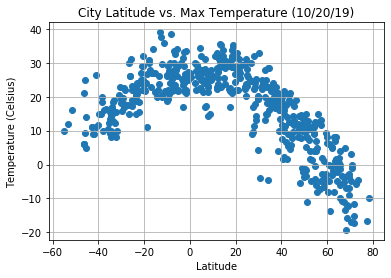

In [58]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Other graph properties
plt.title("City Latitude vs. Max Temperature (10/20/19)")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("maxtemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

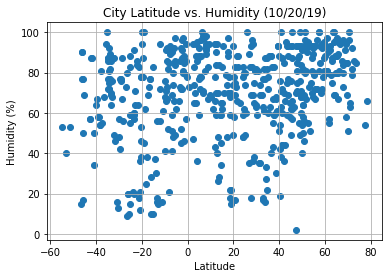

In [59]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Graph properties
plt.title("City Latitude vs. Humidity (10/20/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

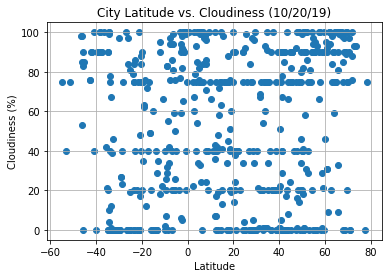

In [60]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Other graph properties
plt.title("City Latitude vs. Cloudiness (10/20/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

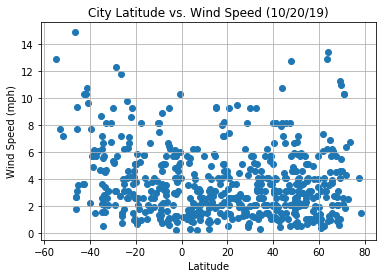

In [61]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Other graph properties
plt.title("City Latitude vs. Wind Speed (10/20/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("windspeed.png")

# Show plot
plt.show()